# Development of an improved model by integrating data mining and genetic algorithms to predict the length of hospital stay (case study: Alborz Hospital in karaj)

# Part 1: Modeling

## Set up environment

In [1]:
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [2]:
# modules we'll use more often
import pandas as pd    #for working with dataframes
import numpy as np
import seaborn as sns  #for plots
import matplotlib.pyplot as plt # for plots
import datetime        #for woking with dates
import statsmodels.api as sm #for model building
import itertools

print('setup complete!')

setup complete!


In [3]:
# set seed for reproducibility
np.random.seed(0)
print('Seed is set!')

Seed is set!


## Phase 0: Review dataset of Albors hospital

### Introducing Variables and the data features

In [4]:
# reading variable description table in English
variable_definition_english = pd.read_excel(io= "F:\\Atefe\\Arshad\\98-sanaye\\0-payan name- edari\\payanname\\paper\\English paper-journal of healthcare engineering\\files\\code files\\variable description-for paper.xlsx", 
                                 sheet_name = 'variable description english 1', index_col=0 )
variable_definition_english

,Variable name,Variable Description
No.,,
1,Age,Age in years at time of discharge
2,Gender,"Patient gender: (M) Male, (F) Female, (U) Unknown"
3,Marital status,"Marital status of the patient: Married, Single"
4,Main insurance type,Main insurance type of patient: Ordinary Socia...
5,Physician expertise level,Physician expertise level: General Practitione...
6,Medical advice number,Number of times the patient received consultancy
7,LOS,Hopital Length of saty


In [5]:
#printing varible names and their description in persian
for i in range(len(variable_definition_english)):
    print("Variable name {}: {} \n\nDescription {}: {} \n {} ".format(i+1 ,variable_definition_english.iloc[i, 0], i+1, variable_definition_english.iloc[i, 1],
                                                              '_'*120))

Variable name 1: Age 

Description 1: Age in years at time of discharge 
 ________________________________________________________________________________________________________________________ 
Variable name 2: Gender 

Description 2: Patient gender: (M) Male, (F) Female, (U) Unknown 
 ________________________________________________________________________________________________________________________ 
Variable name 3: Marital status 

Description 3: Marital status of the patient: Married, Single 
 ________________________________________________________________________________________________________________________ 
Variable name 4: Main insurance type 

Description 4: Main insurance type of patient: Ordinary Social Security Insurance (Ordinary SSI), Occupational Social Security Insurance (Occupational SSI), Employee Health Insurance (Employee HI), Special Social Security Insurance (Special SSI), Without Insurance (Without insurance) 
 ___________________________________________

In [6]:
# read in our data
alborzHospital_data_E = pd.read_excel("F:\\Atefe\\Arshad\\98-sanaye\\0-payan name- edari\\payanname\\paper\\English paper-journal of healthcare engineering\\files\\code files\\Alborz hospitaldata-cleaned and organized-for paper.xlsx",
                                   sheet_name = 'clean data-English paper', index_col=0)

### Data inspection

In [7]:
#check that our data is loaded
alborzHospital_data_E.head()

,Age,Gender,Marital stastus,Main insurance type,Physician experty level,Medical advice number,LOS
Row,,,,,,,
1,25,F,Married,Ordinary SSI,General Practitioner,5,11
2,89,F,Married,Ordinary SSI,Specialist,5,4
3,75,F,Married,Ordinary SSI,Specialist,1,3
4,88,F,Married,Ordinary SSI,Specialist,1,7
5,32,F,single,Ordinary SSI,Specialist,1,5


In [8]:
# dataset dimention
alborzHospital_data_E.shape

(200, 7)

In [9]:
#cheking missing values
alborzHospital_data_E.isnull().sum()

Age                        0
Gender                     0
Marital stastus            0
Main insurance type        0
Physician experty level    0
Medical advice number      0
LOS                        0
dtype: int64

In [10]:
#move data to another variable to keep the original data and work with a simpler name
data = alborzHospital_data_E

In [11]:
data.head()

,Age,Gender,Marital stastus,Main insurance type,Physician experty level,Medical advice number,LOS
Row,,,,,,,
1,25,F,Married,Ordinary SSI,General Practitioner,5,11
2,89,F,Married,Ordinary SSI,Specialist,5,4
3,75,F,Married,Ordinary SSI,Specialist,1,3
4,88,F,Married,Ordinary SSI,Specialist,1,7
5,32,F,single,Ordinary SSI,Specialist,1,5


In [12]:
#data dimention
data.shape

(200, 7)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      200 non-null    int64 
 1   Gender                   200 non-null    object
 2   Marital stastus          200 non-null    object
 3   Main insurance type      200 non-null    object
 4   Physician experty level  200 non-null    object
 5   Medical advice number    200 non-null    int64 
 6   LOS                      200 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 12.5+ KB


In [14]:
data.describe()

,Age,Medical advice number,LOS
count,200.000000,200.000000,200.00000
mean,63.620000,2.495000,5.62500
std,19.461742,2.882973,3.47921
min,17.000000,0.000000,1.00000
25%,50.000000,1.000000,4.00000
50%,64.500000,2.000000,5.00000
75%,78.000000,3.000000,7.00000
max,97.000000,21.000000,28.00000


In [15]:
data.head()

,Age,Gender,Marital stastus,Main insurance type,Physician experty level,Medical advice number,LOS
Row,,,,,,,
1,25,F,Married,Ordinary SSI,General Practitioner,5,11
2,89,F,Married,Ordinary SSI,Specialist,5,4
3,75,F,Married,Ordinary SSI,Specialist,1,3
4,88,F,Married,Ordinary SSI,Specialist,1,7
5,32,F,single,Ordinary SSI,Specialist,1,5


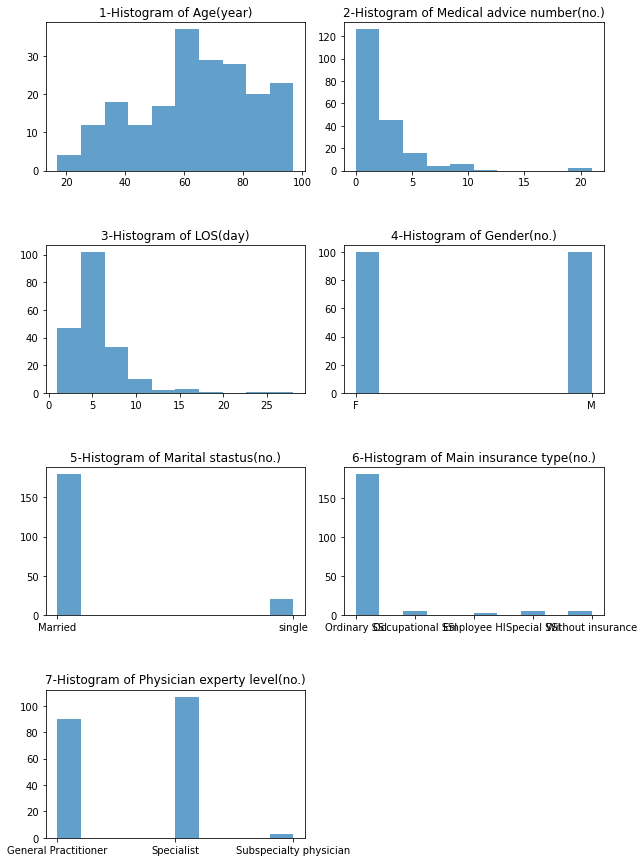

In [16]:
#All variables distribution
#data['Age, Medical advice number', 'LOS', 'Gender', 'Marital stastus', 'Main insurance type',
#'Physician experty level']
import seaborn as sns  #for plots
import matplotlib.pyplot as plt # for plots
var_ind = [0, 5, 6, 1, 2, 3, 4 ]
var_num= ['1', '2','3', '4','5', '6','7']
units = ['(year)', '(no.)', '(day)', '(no.)', '(no.)', '(no.)', '(no.)' ]
plot = plt.figure(figsize = (10, 15))
plot.subplots_adjust(hspace = 0.5, wspace = 0.15)
for i in range(1, 8):
    a = plot.add_subplot(4, 2, i)
    a.hist(data.iloc[: , var_ind[i - 1]], alpha = 0.7)
    a.title.set_text(var_num[i-1]+'-Histogram of ' + data.columns[var_ind[i - 1]] + units[i-1])

Text(0.5, 1.0, 'Boxplot of LOS(day)')

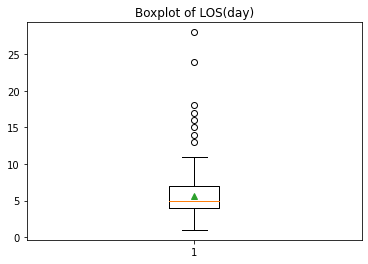

In [17]:
#Box plot of LOS
plt.boxplot(data['LOS'], showmeans = True)
plt.title('Boxplot of LOS(day)')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


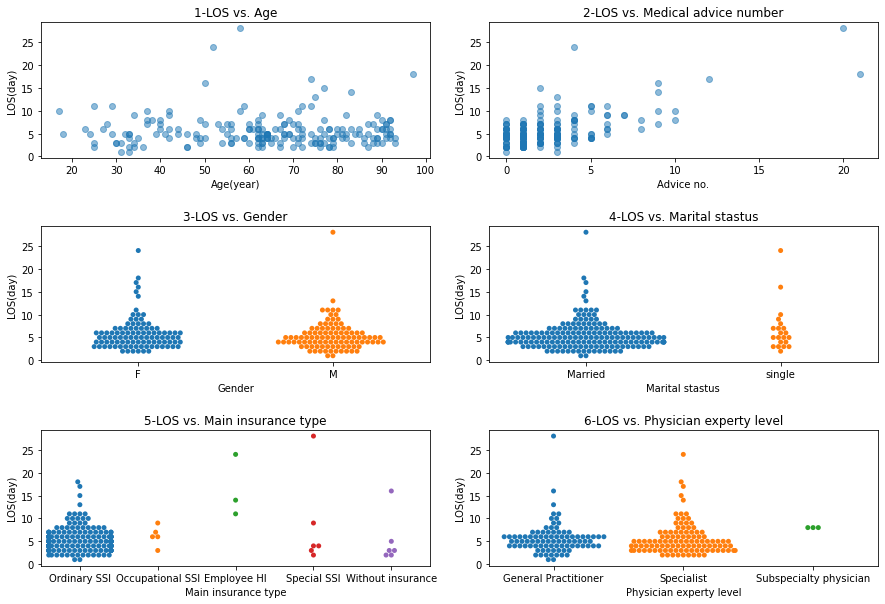

In [18]:
#Scatter plot of all varible vs LOS
#data['Age, Medical advice number', 'LOS', 'Gender', 'Marital stastus', 'Main insurance type',
#'Physician experty level']
import seaborn as sns  #for plots
import matplotlib.pyplot as plt # for plots
var_ind = [0, 5, 1, 2, 3, 4 ]
var_num= ['1', '2','3', '4','5', '6']
X_label = ['Age(year)', 'Advice no.']
plot = plt.figure(figsize = (15, 10))
plot.subplots_adjust(hspace = 0.5, wspace = 0.15)
for i in range(1, 3):
    a = plot.add_subplot(3, 2, i)
    a.scatter(x = data.iloc[: , var_ind[i - 1]], y = data.iloc[: , 6], alpha = 0.5)
    a.title.set_text(var_num[i-1] + '-LOS vs. ' + data.columns[var_ind[i - 1]])
    a.set_xlabel(X_label[i-1])
    a.set_ylabel('LOS(day)')
for i in range(3, 7):
    a = plot.add_subplot(3, 2, i)
    sns.swarmplot(x = data.iloc[: , var_ind[i - 1]], y = data.iloc[: , 6])
    a.title.set_text(var_num[i-1] + '-LOS vs. ' + data.columns[var_ind[i - 1]])
    a.set_ylabel('LOS(day)')

In [19]:
#continious varibales
data.describe()

,Age,Medical advice number,LOS
count,200.000000,200.000000,200.00000
mean,63.620000,2.495000,5.62500
std,19.461742,2.882973,3.47921
min,17.000000,0.000000,1.00000
25%,50.000000,1.000000,4.00000
50%,64.500000,2.000000,5.00000
75%,78.000000,3.000000,7.00000
max,97.000000,21.000000,28.00000


In [20]:
#Categorical variables
data["Gender"].value_counts()

F    100
M    100
Name: Gender, dtype: int64

In [21]:
#Categorical variables
data["Marital stastus"].value_counts()

Married    179
single      21
Name: Marital stastus, dtype: int64

In [22]:
#Categorical variables
data["Main insurance type"].value_counts()

Ordinary SSI         180
Without insurance      6
Special SSI            6
Occupational SSI       5
Employee HI            3
Name: Main insurance type, dtype: int64

In [23]:
#Categorical variables
data["Physician experty level"].value_counts()

Specialist                107
General Practitioner       90
Subspecialty physician      3
Name: Physician experty level, dtype: int64

### ِDealing with outliers

In [24]:
data.shape

(200, 7)

<AxesSubplot:xlabel='LOS', ylabel='Probability'>

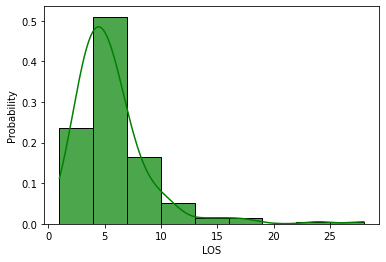

In [25]:
#Histogram of LOS before removing outliers
sns.histplot(data['LOS'], stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(data['LOS']), max(data['LOS']), 10))

In [26]:
#outliers range
q1_los = 4 #from data.describe()
q3_los=  7 #from data.describe()
iqr_los = q3_los - q1_los
lower_bound = q1_los -(1.5 * iqr_los) 
upper_bound = q3_los +(1.5 * iqr_los)
print("lower bound is", lower_bound, "upper bound is", upper_bound)

lower bound is -0.5 upper bound is 11.5


In [27]:
#data bigger than the upper bound
data["LOS"][data["LOS"] > upper_bound]

Row
16     17
22     15
54     18
75     14
91     16
99     24
107    28
174    13
Name: LOS, dtype: int64

In [28]:
# a function to remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [29]:
#removing outliers
data=remove_outlier(data, 'LOS')

In [30]:
data.shape

(192, 7)

<AxesSubplot:xlabel='LOS', ylabel='Probability'>

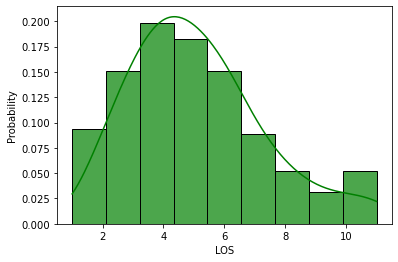

In [31]:
#Histogram of LOS after removing outliers
sns.histplot(data['LOS'], stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(data['LOS']), max(data['LOS']), 10))

## Data prepration

### Removing unnecessary  faetures and columns

In [32]:
data1 = data

In [33]:
data1.head()

,Age,Gender,Marital stastus,Main insurance type,Physician experty level,Medical advice number,LOS
Row,,,,,,,
1,25,F,Married,Ordinary SSI,General Practitioner,5,11
2,89,F,Married,Ordinary SSI,Specialist,5,4
3,75,F,Married,Ordinary SSI,Specialist,1,3
4,88,F,Married,Ordinary SSI,Specialist,1,7
5,32,F,single,Ordinary SSI,Specialist,1,5


In [34]:
data1.shape

(192, 7)

###  Create dummies for columns with categorical variables data set

In [35]:
#Create dummies for columns with categorical variables in  dataset
dummies = pd.get_dummies(data1[['Gender', 'Marital stastus', 'Main insurance type','Physician experty level']])
dummies.head()

,Gender_F,Gender_M,Marital stastus_Married,Marital stastus_single,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
Row,,,,,,,,,,,,
1,1,0,1,0,0,0,1,0,0,1,0,0
2,1,0,1,0,0,0,1,0,0,0,1,0
3,1,0,1,0,0,0,1,0,0,0,1,0
4,1,0,1,0,0,0,1,0,0,0,1,0
5,1,0,0,1,0,0,1,0,0,0,1,0


In [36]:
#Define the data set with dummies for categorical variabl
#we do this so that both train and test data set have the same columns after the whole data set is split.

X_ = data1.drop(['Gender', 'Marital stastus', 'Main insurance type', 'Physician experty level'], axis = 1)
data2 = pd.concat([X_, dummies[dummies.columns]], axis = 1)


In [37]:
data2.shape

(192, 15)

In [38]:
data2.head()

,Age,Medical advice number,LOS,Gender_F,Gender_M,Marital stastus_Married,Marital stastus_single,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
Row,,,,,,,,,,,,,,,
1,25,5,11,1,0,1,0,0,0,1,0,0,1,0,0
2,89,5,4,1,0,1,0,0,0,1,0,0,0,1,0
3,75,1,3,1,0,1,0,0,0,1,0,0,0,1,0
4,88,1,7,1,0,1,0,0,0,1,0,0,0,1,0
5,32,1,5,1,0,0,1,0,0,1,0,0,0,1,0


### Data inspection after creating dummy variables

In [39]:
#Correlation analysis
corr_table1 = round(data2.iloc[:, :].corr(method = 'pearson'), 2)

<AxesSubplot:>

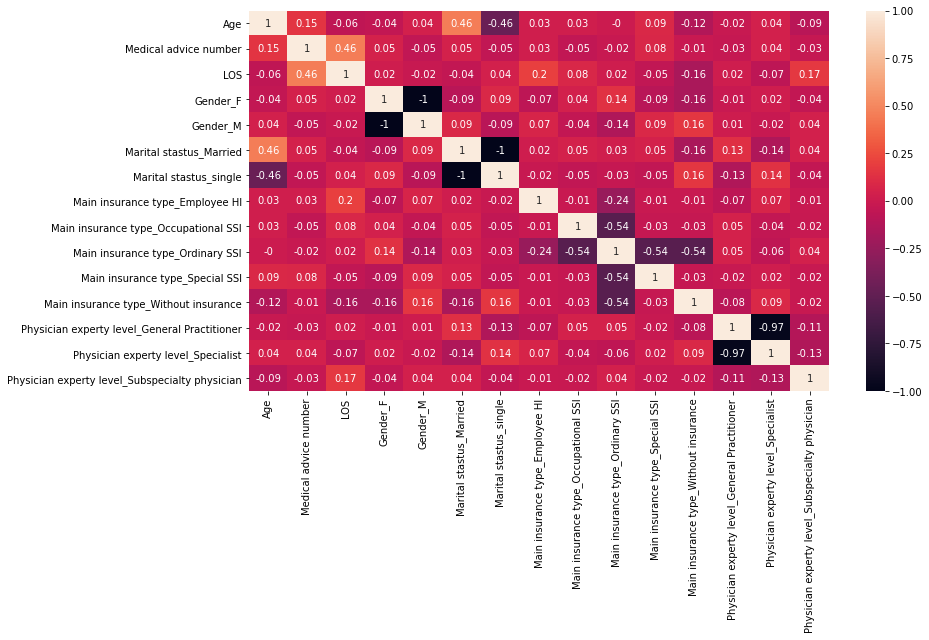

In [40]:
plot = plt.figure(figsize = (13, 7))
sns.heatmap(corr_table1, annot = True)

In [41]:
#rmoving variables with two categoreis and the complementry insurance types due to high correlation with the main ones
data2 = data2.drop(['Gender_M', 'Marital stastus_single'], axis = 1)

In [42]:
data2.shape

(192, 13)

In [43]:
data2.head()

,Age,Medical advice number,LOS,Gender_F,Marital stastus_Married,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
Row,,,,,,,,,,,,,
1,25,5,11,1,1,0,0,1,0,0,1,0,0
2,89,5,4,1,1,0,0,1,0,0,0,1,0
3,75,1,3,1,1,0,0,1,0,0,0,1,0
4,88,1,7,1,1,0,0,1,0,0,0,1,0
5,32,1,5,1,0,0,0,1,0,0,0,1,0


In [44]:
#to  calculate the p_valu of the correlation
from scipy import stats
res = stats.pearsonr(np.array(data2.iloc[:, 2]), np.array(data2.iloc[:, 0]))
corr_pvalues = pd.DataFrame(columns=['variable', 'correlation', 'p_value'])
for i in range(0,13):
    
    res = stats.pearsonr(np.array(data2.iloc[:, 2]), np.array(data2.iloc[:, i]))
    corr_pvalues = corr_pvalues.append(pd.DataFrame({'variable':data2.columns[i], 'correlation': round(res[0], 2), 'p_value': round(res[1], 4)},
                                                    index=[i+1]))

   

corr_pvalues.to_excel('corr_pvalues .xlsx') 
corr_pvalues 

,variable,correlation,p_value
1,Age,-0.06,0.4032
2,Medical advice number,0.46,0.0000
3,LOS,1.00,0.0000
4,Gender_F,0.02,0.7823
5,Marital stastus_Married,-0.04,0.5808
6,Main insurance type_Employee HI,0.20,0.0066
7,Main insurance type_Occupational SSI,0.08,0.2579
8,Main insurance type_Ordinary SSI,0.02,0.7514
9,Main insurance type_Special SSI,-0.05,0.4677
10,Main insurance type_Without insurance,-0.16,0.0291


In [45]:
#Correlation analysis  after removing unnecessary variables
corr_table2 = round(data2.iloc[:, :].corr(method = 'pearson'), 2)
#corr_table2

In [46]:
#corr_table2.to_excel('corr_table2.xlsx')

<AxesSubplot:>

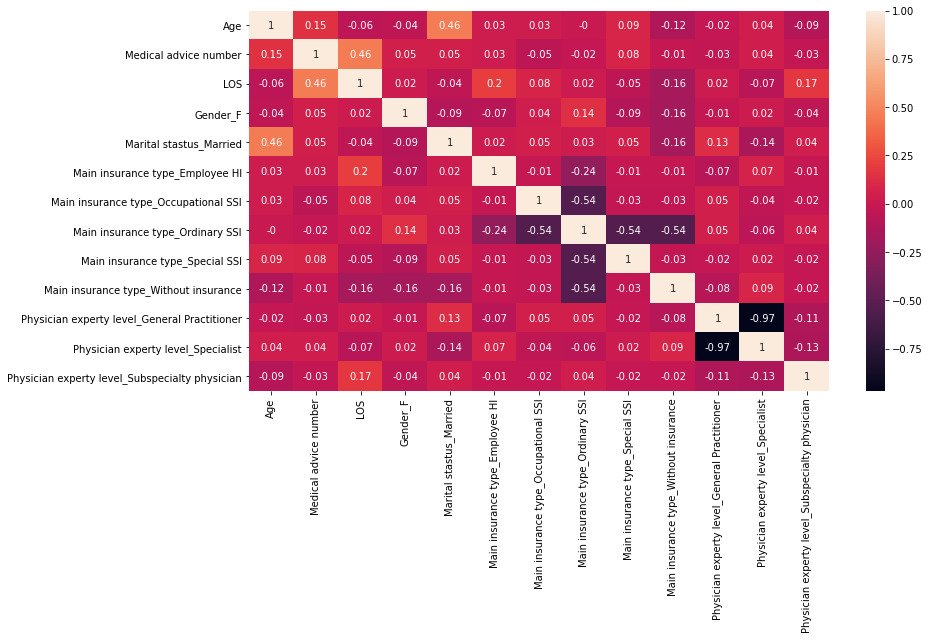

In [47]:
plot = plt.figure(figsize = (13, 7))
sns.heatmap(corr_table2, annot = True)

###  Divide Dataset into Train and Test

In [48]:
data2.shape

(192, 13)

In [49]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data2, test_size = 0.15, random_state = 0)

In [50]:
train.shape

(163, 13)

In [51]:
test.shape

(29, 13)

In [52]:
train.head()

,Age,Medical advice number,LOS,Gender_F,Marital stastus_Married,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
Row,,,,,,,,,,,,,
36,62,1,6,1,1,0,0,1,0,0,1,0,0
5,32,1,5,1,0,0,0,1,0,0,0,1,0
59,33,0,5,1,1,0,0,1,0,0,1,0,0
103,62,0,2,0,1,0,0,1,0,0,1,0,0
47,75,3,4,1,1,0,0,1,0,0,1,0,0


In [53]:
test.head()

,Age,Medical advice number,LOS,Gender_F,Marital stastus_Married,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
Row,,,,,,,,,,,,,
118,29,6,11,0,1,0,0,1,0,0,0,1,0
79,65,0,3,1,1,0,0,1,0,0,0,1,0
171,67,1,2,0,1,0,0,1,0,0,0,1,0
104,25,1,3,0,0,0,0,0,0,1,0,1,0
134,46,1,5,0,1,0,0,1,0,0,0,1,0


In [54]:
train.describe()

,Age,Medical advice number,LOS,Gender_F,Marital stastus_Married,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,63.453988,2.184049,5.098160,0.515337,0.901840,0.006135,0.024540,0.920245,0.024540,0.024540,0.484663,0.503067,0.012270
std,19.606689,2.058524,2.137885,0.501305,0.298447,0.078326,0.155195,0.271748,0.155195,0.155195,0.501305,0.501531,0.110427
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,2.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,79.000000,3.000000,6.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,93.000000,10.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
test.describe()

,Age,Medical advice number,LOS,Gender_F,Marital stastus_Married,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,62.586207,2.172414,5.137931,0.344828,0.896552,0.0,0.034483,0.896552,0.034483,0.034483,0.275862,0.689655,0.034483
std,19.642369,2.088557,2.503200,0.483725,0.309934,0.0,0.185695,0.309934,0.185695,0.185695,0.454859,0.470824,0.185695
min,25.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,1.000000,3.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,67.000000,2.000000,5.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,75.000000,3.000000,6.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,92.000000,9.000000,11.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Defining predictor and predicted Train and test datasets

In [56]:
import statsmodels.api as sm #for model building
X_train = train.drop(['LOS'], axis=1)
X_train = sm.add_constant(X_train, has_constant='add') #adding a constant
#Define response variable
y_train = train['LOS']

In [57]:
X_train.head()

,const,Age,Medical advice number,Gender_F,Marital stastus_Married,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
Row,,,,,,,,,,,,,
36,1.0,62,1,1,1,0,0,1,0,0,1,0,0
5,1.0,32,1,1,0,0,0,1,0,0,0,1,0
59,1.0,33,0,1,1,0,0,1,0,0,1,0,0
103,1.0,62,0,0,1,0,0,1,0,0,1,0,0
47,1.0,75,3,1,1,0,0,1,0,0,1,0,0


In [58]:
y_train.head()

Row
36     6
5      5
59     5
103    2
47     4
Name: LOS, dtype: int64

In [59]:
X_test = test.drop(['LOS'], axis=1)
X_test = sm.add_constant(X_test, has_constant='add') #adding a constant
#Define response variable
y_test = test['LOS']

In [60]:
X_test.head()

,const,Age,Medical advice number,Gender_F,Marital stastus_Married,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
Row,,,,,,,,,,,,,
118,1.0,29,6,0,1,0,0,1,0,0,0,1,0
79,1.0,65,0,1,1,0,0,1,0,0,0,1,0
171,1.0,67,1,0,1,0,0,1,0,0,0,1,0
104,1.0,25,1,0,0,0,0,0,0,1,0,1,0
134,1.0,46,1,0,1,0,0,1,0,0,0,1,0


In [61]:
y_test.head()

Row
118    11
79      3
171     2
104     3
134     5
Name: LOS, dtype: int64

# Building prediction models

## Model 1: KNN

### M1: KNN parameter(number of neighbors) tuning K-fold cross validation 

In [62]:
#preparing for K-fold cross validation
k = 10 # number of folds
np.random.seed(0)
folds = np.random.randint(low = 1, high = k + 1, size = X_train.shape[0])
folds 

array([ 6,  1,  4,  4,  8, 10,  4,  6,  3,  5,  8,  7,  9,  9,  2,  7,  8,
        8,  9,  2,  6, 10,  9, 10,  5,  4,  1,  4,  6,  1,  3,  4,  9,  2,
        4,  4,  4,  8,  1,  2, 10, 10,  1,  5,  8,  4,  3,  8,  3,  1,  1,
        5,  6,  6,  7,  9,  5,  2,  5, 10,  9,  2,  2,  8, 10, 10,  4,  7,
        8,  3,  1,  4,  6, 10,  5,  5,  7,  5,  5,  4,  5,  5,  9,  5,  4,
        8,  6,  6,  1,  2,  6, 10,  4,  1,  6,  1,  2,  3,  5,  3,  1,  4,
        3,  1,  8,  6, 10,  1,  3,  8,  3, 10,  3,  4,  4,  3,  4,  5,  2,
        3, 10,  2,  5,  7,  9,  3,  4,  1,  1,  7,  1,  7,  4,  4,  9,  9,
        9,  3,  4,  3,  1,  9,  9,  4,  9,  3,  9,  5,  4,  1,  5,  4,  7,
       10,  9,  1,  9,  6, 10,  1, 10,  7,  6])

In [63]:
k = 10 # number of folds
n_neighbors = range(1,21)
cv_errors1 = pd.DataFrame(index = range(1, k + 1), columns = n_neighbors)
cv_errors1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
from sklearn import neighbors
for i in n_neighbors:
    for j in range(1, k + 1):
        knn = neighbors.KNeighborsRegressor(n_neighbors = i)
        model_knn = knn.fit(X_train.iloc[folds != j, 1:], y_train[folds != j])
        pred = model_knn.predict(X_train.iloc[folds == j, 1:])
        cv_errors1.iloc[j - 1, i - 1] = ((y_train[folds == j] - pred) ** 2).mean()

In [65]:
cv_errors1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,4.33333,2.42857,1.93122,1.8869,1.8381,2.14286,1.90768,1.89435,1.91593,1.91286,1.49862,1.40212,1.29473,1.431,1.52889,1.50279,1.5823,1.61141,1.80306,1.7956
2,3.36364,3.97727,4.0303,3.89773,3.98909,3.59343,2.44156,2.2983,2.38496,2.29727,2.17581,2.21086,2.31737,2.34555,2.23313,2.24112,2.36269,2.17424,2.23143,2.1825
3,8.41176,5.30882,4.33333,4.66176,4.54353,4.28758,4.26411,4.16268,4.52505,4.48882,4.23724,4.01757,4.33484,4.33433,4.25569,4.41866,4.30857,4.36002,4.41763,4.39985
4,7.73077,8.11538,6.85043,6.5625,5.97231,5.65705,5.54474,5.64062,5.61728,5.64154,5.72886,5.78686,5.90259,6.17406,6.39094,6.13251,6.1963,6.25154,6.13286,6.31115
5,4,5.83333,5.37654,4.19097,3.72667,3.99691,4.4966,4.15885,3.8834,3.72778,3.55647,3.65162,3.92571,4.07341,4.02074,4.13151,4.15013,4.10614,4.2133,4.3175
6,6.42857,6.41071,7.48413,8.04018,7.45429,5.9127,5.51458,5.97321,6.38889,6.56,6.25738,6.07887,5.99366,5.75729,5.52032,5.52623,5.21527,5.31063,5.29699,5.17357
7,7.1,5.25,4.25556,4.21875,4.332,4.61944,4.25102,4.3,4.08765,3.652,3.43471,3.56319,3.67988,3.94286,4.04533,4.13242,4.35121,4.5392,4.71468,4.7815
8,3.33333,2.3125,2.61111,2.06771,2.5,2.74537,2.41837,1.93229,2.00926,2.3375,2.45386,2.36458,2.41519,2.43325,2.58926,2.71354,2.55911,2.60468,2.53509,2.40625
9,8.77778,6.61111,6.04321,4.46528,4.12444,4.21142,4.02154,4.21615,4.44856,4.72278,4.76079,4.81983,5.12952,4.95238,4.96691,4.99436,4.93887,4.73165,4.81302,4.67514
10,9.9375,6.75,6.72917,6.6875,6.8775,7.28819,7.55612,6.76562,7.00617,7.10813,7.11157,6.97439,7.01331,7.27392,7.26556,7.85254,7.66501,7.58044,7.48096,7.34906


In [66]:
cv_errors1.mean(axis = 0)

1     6.341669
2     5.299771
3     4.964499
4     4.667928
5     4.535792
6     4.445497
7     4.241631
8     4.134208
9     4.226717
10    4.244867
11    4.121531
12    4.086989
13    4.200681
14    4.271804
15    4.281677
16    4.364568
17    4.332948
18    4.326995
19    4.363901
20    4.339212
dtype: float64

<AxesSubplot:title={'center':'RMSE vs K'}, xlabel='K (number of neighbors)', ylabel='RMSE(day)'>

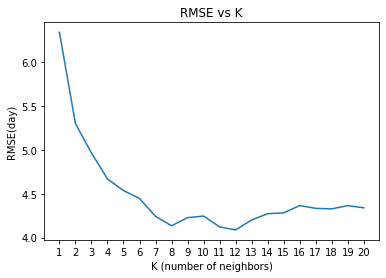

In [67]:
#plotting the rmse values against k values
curve = cv_errors1.mean(axis = 0) #elbow curve 
curve.plot(title = 'RMSE vs K', xlabel = 'K (number of neighbors)', ylabel='RMSE(day)', xticks = range(1,21)) 

In [68]:
#final number of neighbor- min RMSE
cv_errors1.mean(axis = 0).argmin() + 1

12

### M1: KNN Prediction on test data set

In [69]:
#predicting on the test set and creating submission file
knn = neighbors.KNeighborsRegressor(n_neighbors = cv_errors1.mean(axis = 0).argmin() + 1)

model_knn = knn.fit(X_train, y_train)  #fit the model
pred_knn = model_knn.predict(X_test)
pred_knn

array([4.66666667, 4.        , 4.66666667, 4.75      , 4.83333333,
       5.25      , 5.58333333, 3.91666667, 5.41666667, 4.66666667,
       3.83333333, 5.41666667, 5.        , 3.66666667, 5.25      ,
       4.91666667, 5.25      , 6.16666667, 4.83333333, 5.66666667,
       6.41666667, 3.58333333, 5.83333333, 5.41666667, 4.5       ,
       4.33333333, 5.08333333, 4.33333333, 5.16666667])

In [70]:
abs_err_knn = abs(y_test - pred_knn)
abs_err_knn

Row
118    6.333333
79     1.000000
171    2.666667
104    1.750000
134    0.166667
76     0.750000
20     0.583333
165    0.083333
153    0.583333
8      0.333333
6      2.166667
147    0.416667
166    0.000000
179    2.333333
168    1.750000
176    1.083333
40     3.250000
70     1.833333
146    2.833333
130    1.666667
60     3.583333
196    0.583333
144    0.833333
191    4.583333
200    3.500000
160    2.333333
67     2.083333
64     2.333333
169    0.166667
Name: LOS, dtype: float64

In [71]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.DataFrame()
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_knn.mean(),
                                             'Median of AbsErrors' : abs_err_knn.median(),
                                             'SD of AbsErrors' :     abs_err_knn.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_knn),
                                             'Min of AbsErrors':     abs_err_knn.min(),
                                             'Max of AbsErrors':     abs_err_knn.max()}, index = ['KNN']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
KNN,1.778736,1.75,1.495077,1.75,0.0,6.333333


## Model 2: Linear Regression



### Potential problems with regression models

Potential problems with regression models are as follows:(Ref:An Introduction to Statistical Learning
Gareth James
Daniela Witten
Trevor Hastie
Robert Tibshirani
with Applications in R page 92 of pdf file)

1. Non-linearity of the response-predictor relationships.

2. Correlation of error terms.

3. Non-constant variance of error terms.

4. Outliers.

5. High-leverage points.

6. Collinearity

### M2_1: linear model (lm1)

In [72]:
#Regression Model
np.random.seed(0)
lm1 = sm.OLS(y_train, X_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    LOS   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     7.065
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           4.53e-09
Time:                        15:46:10   Log-Likelihood:                -323.53
No. Observations:                 163   AIC:                             669.1
Df Residuals:                     152   BIC:                             703.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

<AxesSubplot:ylabel='Probability'>

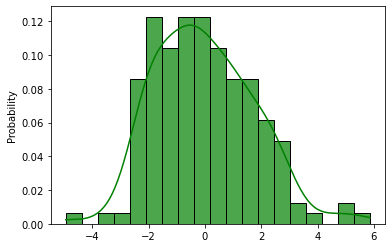

In [73]:
#Check Assumptions of Regression
#Normality of residuals

#Plot histogram of residuals
sns.histplot(lm1.resid, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(lm1.resid), max(lm1.resid), 20))

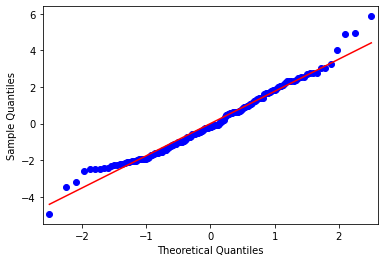

In [74]:
#QQ-plot
qqplot_lm1 = sm.qqplot(lm1.resid, line = 's')
#plt.xlabel('Theoretical Quantiles', fontsize = 12)
#plt.ylabel('Sample Quantiles', fontsize = 12)
#plt.title('QQ Plot of Residuals', fontsize = 12)
plt.show()

In [75]:
#Test for Skewness and Kurtosis
#Good for sample size > 25

#Jarque-Bera Test (Skewness = 0 ?)
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

#Omnibus K-squared normality test
#The Omnibus test combines the random variables for Skewness and Kurtosis into a single test statistic
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

#print(lm1.summary())

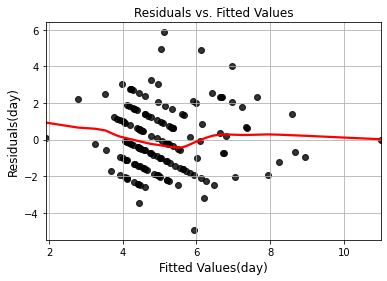

In [76]:
#Residuals vs. Fitted Values
sns.regplot(x = lm1.fittedvalues, y = lm1.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values(day)', fontsize = 12)
plt.ylabel('Residuals(day)', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

In [77]:
#Check Cook's distance
sum(lm1.get_influence().summary_frame().cooks_d >1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:733: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:762: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_external * np.sqrt(hii / (1 - hii))


0

In [78]:
#Check Multicollinearity
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(X_train.iloc[:, 1:])
#If VIF > 10 then multicollinearity is high

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Age,1.357092
1,Medical advice number,1.076052
2,Gender_F,1.062224
3,Marital stastus_Married,1.310526
4,Main insurance type_Employee HI,inf
5,Main insurance type_Occupational SSI,inf
6,Main insurance type_Ordinary SSI,inf
7,Main insurance type_Special SSI,inf
8,Main insurance type_Without insurance,inf
9,Physician experty level_General Practitioner,inf


Conclusion:

Severe violation of regression assumptions

If select variables based on t-test results, limited number of variables will be selected.

Bad model!

t-test results are not reliable for predictors selection.

In [79]:
#Check t-test results
#print(lm1.summary())

In [80]:
#Regression Model based on t-test results
np.random.seed(0)
lm1_ttest = sm.OLS(y_train, X_train[['const','Medical advice number','Main insurance type_Employee HI',
                                    'Main insurance type_Without insurance',
                                     'Physician experty level_Subspecialty physician']]).fit()
lm1_ttest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     14.94
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           2.23e-10
Time:                        15:46:12   Log-Likelihood:                -328.49
No. Observations:                 163   AIC:                             667.0
Df Residuals:                     158   BIC:                             682.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              4.1167      0.213     19.360      0.000       3.697       4.537
Medical advice number                              0.4419      0.070      6.274      0.000       0.303       0.581
Main insurance type_Employee HI                    5.5577      1.851      3.003      0.003       1.902       9.213
Main insurance type_Without insurance             -2.1109      0.934     -2.261      0.025      -3.955      -0.267
Physician experty level_Subspecialty physician     2.7786      1.312      2.117      0.036       0.186       5.371
==============================================================================
Omnibus:                        8.054   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.097
Skew:                           0.543   Prob(JB):                       0.0174
Kurtosis:                       3.104   Cond. No.                         39.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### lm1_ttest: predection on test data set

In [81]:
pred_lm1_ttest = lm1_ttest.predict(X_test[[ 'const','Medical advice number','Main insurance type_Employee HI',
                                    'Main insurance type_Without insurance',
                                     'Physician experty level_Subspecialty physician']])
pred_lm1_ttest

Row
118    6.767854
79     4.116746
171    4.558597
104    2.447686
134    4.558597
76     4.116746
20     5.442300
165    5.884151
153    5.000449
8      6.326003
6      5.442300
147    5.000449
166    5.442300
179    5.000449
168    4.558597
176    5.442300
40     5.000449
70     5.884151
146    4.558597
130    4.116746
60     8.093408
196    4.558597
144    5.884151
191    5.442300
200    6.895372
160    4.558597
67     4.558597
64     4.116746
169    4.116746
dtype: float64

In [82]:
abs_err_lm1_ttets = abs(y_test - pred_lm1_ttest)
abs_err_lm1_ttets

Row
118    4.232146
79     1.116746
171    2.558597
104    0.552314
134    0.441403
76     1.883254
20     0.442300
165    1.884151
153    0.999551
8      1.326003
6      0.557700
147    0.000449
166    0.442300
179    0.999551
168    2.441403
176    0.557700
40     3.000449
70     2.115849
146    2.558597
130    0.116746
60     1.906592
196    1.558597
144    0.884151
191    4.557700
200    1.104628
160    2.558597
67     1.558597
64     2.116746
169    0.883254
dtype: float64

In [83]:
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_lm1_ttets.mean(),
                           'Median of AbsErrors' : abs_err_lm1_ttets.median(),
                           'SD of AbsErrors' :     abs_err_lm1_ttets.std(),
                           'IQR of AbsErrors':     iqr(abs_err_lm1_ttets),
                           'Min of AbsErrors':     abs_err_lm1_ttets.min(),
                           'Max of AbsErrors':     abs_err_lm1_ttets.max()}, index = ['Lm1_t-test']), ignore_index = False)
model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
KNN,1.778736,1.750000,1.495077,1.750000,0.000000,6.333333
Lm1_t-test,1.564003,1.326003,1.137184,1.559046,0.000449,4.557700


### Data Transformation

In [84]:
#log transformation to corret the regression assumptions
logy_train = np.log(y_train)
logy_train

Row
36     1.791759
5      1.609438
59     1.609438
103    0.693147
47     1.386294
         ...   
111    1.791759
71     1.098612
125    1.386294
50     1.098612
181    1.609438
Name: LOS, Length: 163, dtype: float64

<AxesSubplot:xlabel='LOS', ylabel='Probability'>

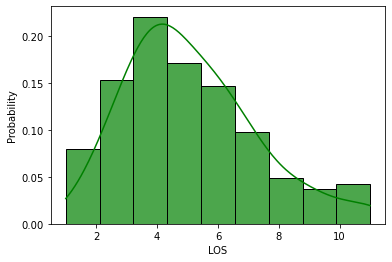

In [85]:
#Histogram of LOS before transformation
sns.histplot(y_train, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(y_train), max(y_train), 10))

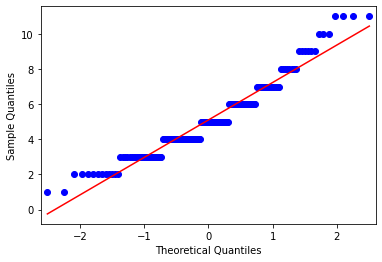

In [86]:
#QQ-plot of LOS before transformation
qqplot_lm_bc = sm.qqplot(y_train, line = 's')
plt.show()

<AxesSubplot:xlabel='LOS', ylabel='Probability'>

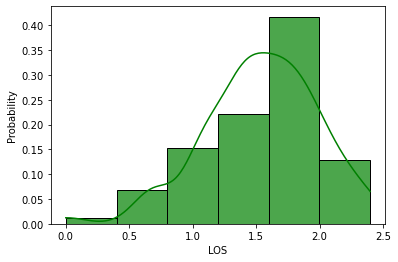

In [87]:
#Histogram of Log LOS after transformation
sns.histplot(logy_train, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(logy_train), max(logy_train), 7))

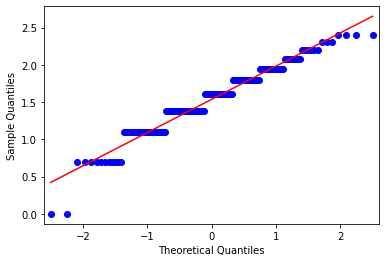

In [88]:
#QQ-plot of log LOS 
qqplot_lm_bc = sm.qqplot(logy_train, line = 's')
plt.show()

### M2_2: linear regression using transformed data(lm2)

In [89]:
#Regression Model
np.random.seed(0)
lm2 = sm.OLS(logy_train, X_train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    LOS   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     5.021
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           2.68e-06
Time:                        15:46:13   Log-Likelihood:                -75.980
No. Observations:                 163   AIC:                             174.0
Df Residuals:                     152   BIC:                             208.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

<AxesSubplot:ylabel='Probability'>

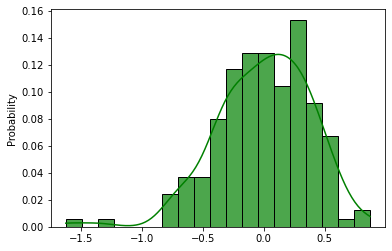

In [90]:
#Check Assumptions of Regression
#Normality of residuals

#Plot histogram of residuals
sns.histplot(lm2.resid, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(lm2.resid), max(lm2.resid), 20))

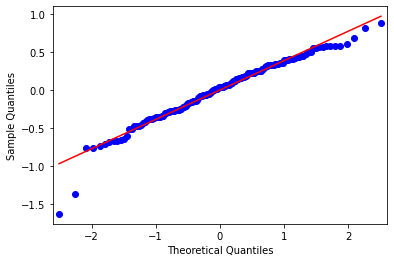

In [91]:
#QQ-plot
qqplot_lm2 = sm.qqplot(lm2.resid, line = 's')
#plt.xlabel('Theoretical Quantiles', fontsize = 12)
#plt.ylabel('Sample Quantiles', fontsize = 12)
#plt.title('QQ Plot of Residuals', fontsize = 12)
plt.show()

In [92]:
#Test for Skewness and Kurtosis
#Good for sample size > 25

#Jarque-Bera Test (Skewness = 0 ?)
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

#Omnibus K-squared normality test
#The Omnibus test combines the random variables for Skewness and Kurtosis into a single test statistic
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

#print(lm2.summary())

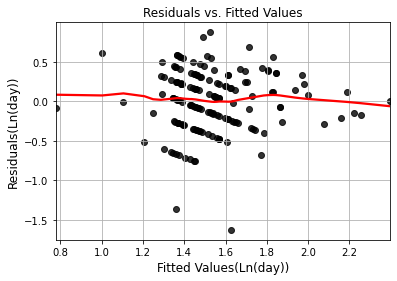

In [93]:
#Residuals vs. Fitted Values
sns.regplot(x = lm2.fittedvalues, y = lm2.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values(Ln(day))', fontsize = 12)
plt.ylabel('Residuals(Ln(day))', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

In [94]:
#Check Cook's distance
sum(lm2.get_influence().summary_frame().cooks_d > 1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:733: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:762: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_external * np.sqrt(hii / (1 - hii))


0

In [95]:
#Check t-test results
#print(lm2.summary())

In [96]:
#Regression Model based on t-test results 
np.random.seed(0)
lm2_ttest = sm.OLS(logy_train, X_train[['const', 'Medical advice number', 'Main insurance type_Employee HI',
                                          'Main insurance type_Occupational SSI', 'Main insurance type_Without insurance',
                                          'Physician experty level_General Practitioner',
                                          'Physician experty level_Specialist',
                                         'Physician experty level_Subspecialty physician']]).fit()
lm2_ttest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     7.826
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           2.25e-07
Time:                        15:46:14   Log-Likelihood:                -77.798
No. Observations:                 163   AIC:                             169.6
Df Residuals:                     156   BIC:                             191.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.1410      0.077     14.832      0.000       0.989       1.293
Medical advice number                              0.0842      0.015      5.510      0.000       0.054       0.114
Main insurance type_Employee HI                    0.8265      0.401      2.059      0.041       0.034       1.619
Main insurance type_Occupational SSI               0.2847      0.202      1.408      0.161      -0.115       0.684
Main insurance type_Without insurance             -0.4989      0.203     -2.463      0.015      -0.899      -0.099
Physician experty level_General Practitioner       0.2349      0.079      2.970      0.003       0.079       0.391
Physician experty level_Specialist                 0.1780      0.079      2.241      0.026       0.021       0.335
Physician experty level_Subspecialty physician     0.7281      0.212      3.429      0.001       0.309       1.148
==============================================================================
Omnibus:                       19.995   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.908
Skew:                          -0.708   Prob(JB):                     8.70e-07
Kurtosis:                       4.451   Cond. No.                     8.96e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [97]:
pred_lm2_ttest = lm2_ttest.predict(X_test[['const', 'Medical advice number', 'Main insurance type_Employee HI',
                                          'Main insurance type_Occupational SSI', 'Main insurance type_Without insurance',
                                          'Physician experty level_General Practitioner',
                                          'Physician experty level_Specialist',
                                         'Physician experty level_Subspecialty physician']])
pred_lm2_ttest

Row
118    1.823863
79     1.318937
171    1.403091
104    0.904152
134    1.403091
76     1.318937
20     1.628365
165    1.655554
153    1.544211
8      1.739709
6      1.571400
147    1.487245
166    1.571400
179    1.828937
168    1.403091
176    1.628365
40     1.544211
70     1.655554
146    1.403091
130    1.318937
60     2.133292
196    1.403091
144    1.655554
191    1.571400
200    1.869055
160    1.460056
67     1.403091
64     1.318937
169    1.375902
dtype: float64

In [98]:
pred_lm2_ttest = np.exp(pred_lm2_ttest)
abs_err_lm2 = abs(y_test - pred_lm2_ttest)
abs_err_lm2

Row
118    4.804252
79     0.739443
171    2.067754
104    0.530164
134    0.932246
76     2.260557
20     0.095539
165    1.235981
153    1.315726
8      0.695684
6      1.186618
147    0.575110
166    0.186618
179    0.227261
168    2.932246
176    0.904461
40     2.684274
70     2.764019
146    2.067754
130    0.260557
60     1.557386
196    1.067754
144    0.235981
191    5.186618
200    1.517829
160    2.306203
67     1.067754
64     1.739443
169    1.041354
dtype: float64

In [99]:
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_lm2.mean(),
                           'Median of AbsErrors' : abs_err_lm2.median(),
                           'SD of AbsErrors' :     abs_err_lm2.std(),
                           'IQR of AbsErrors':     iqr(abs_err_lm2),
                           'Min of AbsErrors':     abs_err_lm2.min(),
                           'Max of AbsErrors':     abs_err_lm2.max()}, index = ['Lm2_transformed_t-test']), ignore_index = False)
model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
KNN,1.778736,1.750000,1.495077,1.750000,0.000000,6.333333
Lm1_t-test,1.564003,1.326003,1.137184,1.559046,0.000449,4.557700
Lm2_transformed_t-test,1.523675,1.186618,1.259453,1.372070,0.095539,5.186618


### M5: Decision tree with default parameters

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
reg_tree_default = DecisionTreeRegressor(random_state=0)

In [102]:
np.random.seed(0)
tree_res_default = reg_tree_default.fit(X_train.iloc[:, 1:], logy_train)

###  M5: Decision tree with default parameters prediction on test data set


In [103]:
pred_tree_default = tree_res_default.predict(X_test.iloc[:, 1:])
pred_tree_default = np.exp(pred_tree_default)
pred_tree_default

array([10.        ,  5.        ,  3.        ,  5.        ,  2.        ,
        2.        ,  7.        ,  5.        ,  8.        , 11.        ,
        3.        ,  7.        ,  4.        ,  7.        ,  2.        ,
        7.        ,  4.        ,  9.        ,  2.        ,  6.        ,
        9.        ,  3.46410162,  4.        ,  3.        ,  2.        ,
        4.        ,  2.        ,  3.        ,  4.        ])

In [104]:
#Absolute error
abs_err_tree_default = abs(y_test - pred_tree_default)
abs_err_tree_default

Row
118    1.000000
79     2.000000
171    1.000000
104    2.000000
134    3.000000
76     4.000000
20     2.000000
165    1.000000
153    2.000000
8      6.000000
6      3.000000
147    2.000000
166    1.000000
179    1.000000
168    5.000000
176    1.000000
40     2.000000
70     1.000000
146    0.000000
130    2.000000
60     1.000000
196    0.464102
144    1.000000
191    7.000000
200    6.000000
160    2.000000
67     1.000000
64     1.000000
169    1.000000
Name: LOS, dtype: float64

In [105]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_tree_default.mean(),
                                             'Median of AbsErrors' : abs_err_tree_default.median(),
                                             'SD of AbsErrors' :     abs_err_tree_default.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_tree_default),
                                             'Min of AbsErrors':     abs_err_tree_default.min(),
                                             'Max of AbsErrors':     abs_err_tree_default.max()}, index = ['DT_default']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
KNN,1.778736,1.750000,1.495077,1.750000,0.000000,6.333333
Lm1_t-test,1.564003,1.326003,1.137184,1.559046,0.000449,4.557700
Lm2_transformed_t-test,1.523675,1.186618,1.259453,1.372070,0.095539,5.186618
DT_default,2.153935,2.000000,1.789571,1.000000,0.000000,7.000000


### M7:Random forest with defaul parameters

library guide link:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [106]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest: Using 2 (1 without constan feature) Features based on the default parameters of RF
np.random.seed(0)
rf_reg = RandomForestRegressor(max_features = 2, random_state = 0, n_estimators = 100)
rf_res = rf_reg.fit(X_train.iloc[:, 1:], logy_train)

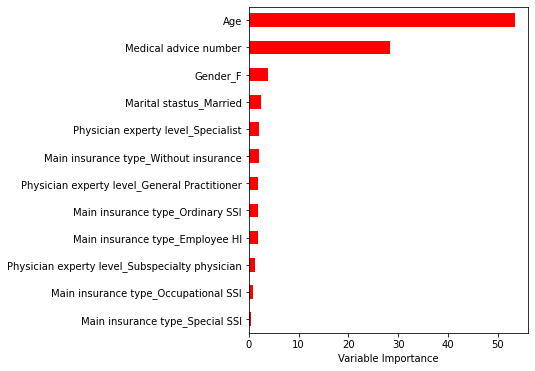

In [107]:
Importance = pd.DataFrame({'Importance':rf_res.feature_importances_ * 100}, 
                          index = X_train.iloc[:, 1:].columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r', figsize= (5, 6))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### M7: Random forest prediction on test data set

In [108]:
pred_rf = rf_res.predict(X_test.iloc[:, 1:])
pred_rf = np.exp(pred_rf)
pred_rf

array([6.47792018, 4.31265907, 6.57800689, 2.44429059, 2.56328599,
       2.72638171, 5.60334905, 4.8442347 , 6.08853407, 6.51480651,
       3.61308983, 5.5582074 , 5.20444216, 5.73751228, 6.13464296,
       5.50125425, 4.66482494, 6.5576057 , 2.56328599, 4.15234837,
       6.89474688, 3.76998326, 5.8330141 , 4.28656934, 6.16684117,
       4.09192173, 4.01991779, 4.64520049, 5.61701551])

In [109]:
#Absolute error
abs_err_rf = abs(y_test - pred_rf)
abs_err_rf

Row
118    4.522080
79     1.312659
171    4.578007
104    0.555709
134    2.436714
76     3.273618
20     0.603349
165    0.844235
153    0.088534
8      1.514807
6      2.386910
147    0.558207
166    0.204442
179    0.262488
168    0.865357
176    0.498746
40     2.664825
70     1.442394
146    0.563286
130    0.152348
60     3.105253
196    0.769983
144    0.833014
191    5.713431
200    1.833159
160    2.091922
67     1.019918
64     2.645200
169    0.617016
Name: LOS, dtype: float64

In [110]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_rf.mean(),
                                             'Median of AbsErrors' : abs_err_rf.median(),
                                             'SD of AbsErrors' :     abs_err_rf.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_rf),
                                             'Min of AbsErrors':     abs_err_rf.min(),
                                             'Max of AbsErrors':     abs_err_rf.max()}, index = ['RF_default']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
KNN,1.778736,1.750000,1.495077,1.750000,0.000000,6.333333
Lm1_t-test,1.564003,1.326003,1.137184,1.559046,0.000449,4.557700
Lm2_transformed_t-test,1.523675,1.186618,1.259453,1.372070,0.095539,5.186618
DT_default,2.153935,2.000000,1.789571,1.000000,0.000000,7.000000
RF_default,1.653711,1.019918,1.470319,1.873428,0.088534,5.713431


### M9: XGboost regression with default parameters

xgboost module documentation

https://xgboost.readthedocs.io/en/stable/

explaination of parameters

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [111]:
#pip install xgboost

In [112]:
from xgboost import XGBRegressor

In [113]:
xgb_reg = XGBRegressor(n_estimators = 1000,
                       max_depth = 6,               #the maximum depth of each tree [0,infinity]
                       learning_rate = 0.3,        #learning rate[0,1]      
                       subsample = 1,             #the fraction of samples to be used when constructing each tree(0,1]
                       colsample_bytree = 1,      #subsample ratio of columns when constructing each tree (0, 1]
                       reg_lambda = 1,            #L2 (Ridge) regularization term [0,infinity]
                       n_jobs = -1,                 #-1 means using all processors.
                       random_state = 0)

xgb_res = xgb_reg.fit(X_train.iloc[:, 1:], logy_train)


### M9: XGboost regression model prediction on test data set (default parameter)

In [114]:
pred_xgb = xgb_res.predict(X_test.iloc[:, 1:])
pred_xgb = np.exp(pred_xgb)
pred_xgb

array([ 8.439775 ,  3.8145847,  4.8321304,  3.365789 ,  2.0042846,
        2.5662644,  6.9952064,  5.435891 ,  9.048363 ,  8.150471 ,
        2.8835168,  6.979005 ,  4.7228975,  2.4866128,  3.6440735,
        4.1651583,  9.665752 , 11.351647 ,  2.0042846,  7.368607 ,
        8.954838 ,  3.2984576,  4.666918 ,  2.8927324,  2.4351473,
        4.6175823,  3.2069964,  4.2817545,  4.5128603], dtype=float32)

In [115]:
#Absolute error
abs_err_xgb = abs(y_test - pred_xgb)
abs_err_xgb

Row
118    2.560225
79     0.814585
171    2.832130
104    0.365789
134    2.995715
76     3.433736
20     1.995206
165    1.435891
153    3.048363
8      3.150471
6      3.116483
147    1.979005
166    0.277102
179    3.513387
168    3.355927
176    1.834842
40     7.665752
70     3.351647
146    0.004285
130    3.368607
60     1.045162
196    0.298458
144    0.333082
191    7.107268
200    5.564853
160    2.617582
67     0.206996
64     2.281754
169    0.487140
Name: LOS, dtype: float64

In [116]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_xgb.mean(),
                                             'Median of AbsErrors' : abs_err_xgb.median(),
                                             'SD of AbsErrors' :     abs_err_xgb.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_xgb),
                                             'Min of AbsErrors':     abs_err_xgb.min(),
                                             'Max of AbsErrors':     abs_err_xgb.max()}, index = ['XGB_default']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
KNN,1.778736,1.750000,1.495077,1.750000,0.000000,6.333333
Lm1_t-test,1.564003,1.326003,1.137184,1.559046,0.000449,4.557700
Lm2_transformed_t-test,1.523675,1.186618,1.259453,1.372070,0.095539,5.186618
DT_default,2.153935,2.000000,1.789571,1.000000,0.000000,7.000000
RF_default,1.653711,1.019918,1.470319,1.873428,0.088534,5.713431
XGB_default,2.449705,2.560225,1.931901,2.537063,0.004285,7.665752


### M10: ANN

In [117]:
#pip install --user tensorflow

In [118]:
import tensorflow as tf
from tensorflow import keras

In [119]:
#min-max normalization to scale the data
from sklearn.preprocessing import MinMaxScaler
X_train_scaled = MinMaxScaler().fit_transform(X_train.values)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled.head()

,const,Age,Medical advice number,Gender_F,Marital stastus_Married,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
0,0.0,0.592105,0.1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.197368,0.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.210526,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.592105,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.763158,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [120]:
X_train_scaled.describe()

,const,Age,Medical advice number,Gender_F,Marital stastus_Married,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
count,163.0,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.0,0.611237,0.218405,0.515337,0.901840,0.006135,0.024540,0.920245,0.024540,0.024540,0.484663,0.503067,0.012270
std,0.0,0.257983,0.205852,0.501305,0.298447,0.078326,0.155195,0.271748,0.155195,0.155195,0.501305,0.501531,0.110427
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.434211,0.100000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.618421,0.200000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.0,0.815789,0.300000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
X_train_scaled = X_train_scaled.drop('const', axis=1)

In [122]:
X_train_scaled.describe()

,Age,Medical advice number,Gender_F,Marital stastus_Married,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.611237,0.218405,0.515337,0.901840,0.006135,0.024540,0.920245,0.024540,0.024540,0.484663,0.503067,0.012270
std,0.257983,0.205852,0.501305,0.298447,0.078326,0.155195,0.271748,0.155195,0.155195,0.501305,0.501531,0.110427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.434211,0.100000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.618421,0.200000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.815789,0.300000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
logy_train

Row
36     1.791759
5      1.609438
59     1.609438
103    0.693147
47     1.386294
         ...   
111    1.791759
71     1.098612
125    1.386294
50     1.098612
181    1.609438
Name: LOS, Length: 163, dtype: float64

### M10: Build the training model

In [124]:
X_train_scaled.shape

(163, 12)

In [125]:
#Define the model architecture
np.random.seed(1234)
model_ann = keras.Sequential()
model_ann.add(keras.layers.Dense(12, input_dim = 12, activation = "relu"))  #Layer 1
model_ann.add(keras.layers.Dense(6, activation = "relu"))                    #Layer 2
model_ann.add(keras.layers.Dense(1))                                         #Output Layer
model_ann.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [126]:
#model_ann.compile?

In [127]:
#Configure the model
np.random.seed(1234)
model_ann.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [128]:
#Train the model w/ epochs = 200
np.random.seed(1234)
model_ann.fit(X_train_scaled, logy_train, epochs = 200)

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 2.5804 - mean_squared_error: 2.5804
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 1.9983 - mean_squared_error: 1.9983
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 1.5897 - mean_squared_error: 1.5897
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 1.2784 - mean_squared_error: 1.2784
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 1.0447 - mean_squared_error: 1.0447
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8611 - mean_squared_error: 0.8611
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7186 - mean_squared_error: 0.7186
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6054 - mean_squared_error: 0.6054
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5186 - mean_squared_error: 0.5186
Epoch 10/200
6/6 [===================

In [129]:
# serialize model to JSON
#model_ann_json = model_ann.to_json()
#with open("F:\\Atefe\\Arshad\\98-sanaye\\0-payan name- edari\\payanname\\paper\\English paper-journal of healthcare engineering\\files\\code files\\model_ann.json", "w") as json_file:
#    json_file.write(model_ann_json)

In [130]:
# serialize weights to HDF5
#model_ann.save_weights("F:\\Atefe\\Arshad\\98-sanaye\\0-payan name- edari\\payanname\\paper\\English paper-journal of healthcare engineering\\files\\code files\\model_ann.h5")
#print("Saved model to disk")

### M10: ANN- prediction on test dataset

In [131]:
#loading the models results
from tensorflow.keras.models import Sequential, model_from_json
# load json and create model
json_file = open('F:\\Atefe\\Arshad\\98-sanaye\\0-payan name- edari\\payanname\\paper\\English paper-journal of healthcare engineering\\files\\code files\\model_ann.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_ann = model_from_json(loaded_model_json)

In [132]:
# load weights into new model
model_ann.load_weights("F:\\Atefe\\Arshad\\98-sanaye\\0-payan name- edari\\payanname\\paper\\English paper-journal of healthcare engineering\\files\\code files\\model_ann.h5")
print("Loaded model from disk")

Loaded model from disk


In [133]:
#Configure the model
model_ann.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [134]:
#min-max normalization to scale the data
from sklearn.preprocessing import MinMaxScaler
X_test_scaled = MinMaxScaler().fit_transform(X_test.values)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled.head()

,const,Age,Medical advice number,Gender_F,Marital stastus_Married,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
0,0.0,0.059701,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.597015,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.626866,0.111111,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.313433,0.111111,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [135]:
X_test_scaled.describe()

,const,Age,Medical advice number,Gender_F,Marital stastus_Married,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
count,29.0,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.0,0.560988,0.241379,0.344828,0.896552,0.0,0.034483,0.896552,0.034483,0.034483,0.275862,0.689655,0.034483
std,0.0,0.293170,0.232062,0.483725,0.309934,0.0,0.185695,0.309934,0.185695,0.185695,0.454859,0.470824,0.185695
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.313433,0.111111,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.626866,0.222222,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.0,0.746269,0.333333,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
X_test_scaled = X_test_scaled.drop('const', axis=1)

In [137]:
X_test_scaled.describe()

,Age,Medical advice number,Gender_F,Marital stastus_Married,Main insurance type_Employee HI,Main insurance type_Occupational SSI,Main insurance type_Ordinary SSI,Main insurance type_Special SSI,Main insurance type_Without insurance,Physician experty level_General Practitioner,Physician experty level_Specialist,Physician experty level_Subspecialty physician
count,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.560988,0.241379,0.344828,0.896552,0.0,0.034483,0.896552,0.034483,0.034483,0.275862,0.689655,0.034483
std,0.293170,0.232062,0.483725,0.309934,0.0,0.185695,0.309934,0.185695,0.185695,0.454859,0.470824,0.185695
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313433,0.111111,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.626866,0.222222,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.746269,0.333333,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
y_test.head()

Row
118    11
79      3
171     2
104     3
134     5
Name: LOS, dtype: int64

In [139]:
model_ann.evaluate(X_test_scaled, np.log(y_test))

1/1 [==============================] - 0s 195ms/step - loss: 0.1912 - mean_squared_error: 0.1912


[0.191175177693367, 0.191175177693367]

In [140]:
pred_ann = model_ann.predict(X_test_scaled)
pred_ann = np.exp(pred_ann)
pred_ann = pd.Series(pred_ann[:, 0], index = y_test.index)
pred_ann

Row
118    7.504366
79     3.637734
171    4.414073
104    3.450472
134    4.969599
76     3.498873
20     4.965299
165    5.176844
153    4.721076
8      6.444973
6      4.796254
147    3.973003
166    5.055357
179    4.100301
168    4.325637
176    4.909140
40     4.879735
70     5.581015
146    4.969599
130    3.327909
60     9.033157
196    4.158797
144    5.388300
191    5.285309
200    4.180034
160    4.090101
67     3.942820
64     3.678411
169    4.354030
dtype: float32

In [141]:
#Absolute error
abs_err_ann = abs(y_test - pred_ann)
abs_err_ann

Row
118    3.495634
79     0.637734
171    2.414073
104    0.450472
134    0.030401
76     2.501127
20     0.034701
165    1.176844
153    1.278924
8      1.444973
6      1.203746
147    1.026997
166    0.055357
179    1.899699
168    2.674363
176    1.090860
40     2.879735
70     2.418985
146    2.969599
130    0.672091
60     0.966843
196    1.158797
144    0.388300
191    4.714691
200    3.819966
160    2.090101
67     0.942820
64     1.678411
169    0.645970
dtype: float64

In [142]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_summary = pd.DataFrame({'Mean of AbsErrors':    abs_err_ann.mean(),
                              'Median of AbsErrors' : abs_err_ann.median(),
                              'SD of AbsErrors' :     abs_err_ann.std(),
                              'IQR of AbsErrors':     iqr(abs_err_ann),
                              'Min of AbsErrors':     abs_err_ann.min(),
                              'Max of AbsErrors':     abs_err_ann.max()}, index = ['ANN'])
model_summary

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
ANN,1.61249,1.203746,1.198698,1.746894,0.030401,4.714691


In [143]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_ann.mean(),
                              'Median of AbsErrors' : abs_err_ann.median(),
                              'SD of AbsErrors' :     abs_err_ann.std(),
                              'IQR of AbsErrors':     iqr(abs_err_ann),
                              'Min of AbsErrors':     abs_err_ann.min(),
                              'Max of AbsErrors':     abs_err_ann.max()}, index = ['ANN']))
model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
KNN,1.778736,1.750000,1.495077,1.750000,0.000000,6.333333
Lm1_t-test,1.564003,1.326003,1.137184,1.559046,0.000449,4.557700
Lm2_transformed_t-test,1.523675,1.186618,1.259453,1.372070,0.095539,5.186618
DT_default,2.153935,2.000000,1.789571,1.000000,0.000000,7.000000
RF_default,1.653711,1.019918,1.470319,1.873428,0.088534,5.713431
XGB_default,2.449705,2.560225,1.931901,2.537063,0.004285,7.665752
ANN,1.612490,1.203746,1.198698,1.746894,0.030401,4.714691


# Part 2: Optimization

## Optimization framework:

1-define fitness function: MSE

2-define initial parameters  of the Tree-based model 

3-define initial parameters  of GA: 


        num_generation
        
        number of parents mating
        
        solution per population
        
        selectiontype: sss
        
        crossover type: Uniform
        
        cross over probability :60%
        
        mutation type: random
        
        mutation probability: 1%
        
        

    

4-Building GA instance

5-Running GA algorithm and saving the results

6- Printing the results

In [144]:
#pip install pygad

In [145]:
import pygad 

## PyGad cycle

PyGad document link:
    
 https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html   

### 1-XGboost Optimization

In [146]:
from xgboost import XGBRegressor

#### XGB-fitness function

In [147]:
#1-defining fitness function for xgboost
#This function must be a maximization function 
#solution = [n_estimators, max_depth, learning_rate, subsample, colsample_bytree , reg_lambda]
def fitness_func_xgb1(solution, solution_idx): #solution: parameters of the xgb----soulutoin_idx: the index of parameter
    #relation between fitness and solution
    k = 5
    np.random.seed(0)
    folds = np.random.randint(low = 1, high = k + 1, size = X_train.shape[0])
    cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1))
    for j in range(1, k + 1):
        xgb_reg = XGBRegressor( n_estimators = solution[0],          #number of trees in total
                       max_depth =  solution[1] ,               #the maximum depth of each tree
                       learning_rate = solution[2],        #learning rate      
                       subsample = solution[3],             #the fraction of samples to be used when constructing each tree
                       colsample_bytree = solution[4],      #subsample ratio of columns when constructing each tree
                       reg_lambda = solution[5],            #L2 (Ridge) regularization term
                       #reg_alpha = solution[6],             #L1 (Lasso) regularization term
                       n_jobs = -1,                 #-1 means using all processors.
                       random_state = 0)            # for random numbers
    

        xgb_res = xgb_reg.fit(X_train.iloc[folds != j, 1:], logy_train[folds != j])
        pred = xgb_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1, 0] = ((logy_train[folds == j] - pred) ** 2).mean()
    
    fitness = -cv_errors.mean(axis = 0)[0]
    return fitness

#### XGB-Intial parameters

In [148]:
#2-defining the  space of xgboost with the whole range parameters to be used in GA
     #range [0,infinity]
n_estimators_gene_space1 = {"low": 10.0, "high":1000.0, }
max_depth_gene_space1 = {"low": 1.0, "high":15.0}
learning_rate_gene_space1  =  {"low": 0.01, "high": 1}  #range (0,1]
subsample_gene_space1 = {'low': 0.1, 'high': 1.0 }         #range (0,1]
colsample_bytree_gene1_space = {'low': 0.1, 'high': 1.0} #range (0,1]
reg_lambda_gene_space1 = {'low': 1.0, 'high': 3.0}        #range [0,infinity]
#reg_alpha_gene_space1 = {'low': 1.0, 'high': 3.0}       #range [0,infinity]

#3-defining the  GA parametes and initials for xgb
fitness_function1 = fitness_func_xgb1 

num_generations1 = 50 
num_parents_mating1 = 2 
sol_per_pop1 = 20 #solutiion per population 
num_genes1 = 6   #=number of parameters



gene_type1= [ int, int , float, float, float, float]
gene_space1=[n_estimators_gene_space1, max_depth_gene_space1, learning_rate_gene_space1, subsample_gene_space1,
            colsample_bytree_gene1_space, reg_lambda_gene_space1 ]

parent_selection_type1 = "sss"  
keep_parents1 = -1               

crossover_type1 = "uniform"     
crossover_probability1 = 0.6

mutation_type1 = "random"        
mutation_probability1 = 0.01
      

#### XGB-GA algorithm

In [149]:
#4-building the GA algorithm for xgb
#ga_instance_xgb1 = pygad.GA(num_generations=num_generations1,
#                       num_parents_mating=num_parents_mating1,
#                       fitness_func=fitness_function1,
#                       sol_per_pop=sol_per_pop1,
#                       num_genes=num_genes1,
#                       gene_type=gene_type1,
#                       gene_space=gene_space1,
#                       parent_selection_type=parent_selection_type1,
#                       keep_parents=keep_parents1,
#                       crossover_type=crossover_type1,
#                       crossover_probability=crossover_probability1,
#                       mutation_type=mutation_type1,
#                       mutation_probability=mutation_probability1)
#                       #stop_criteria=["saturate_15"]) #stopps  criteria  



#5-runing the GA for xgb
#import time #to measure the processing time
#start_time = time.time()
#np.random.seed(0)
#ga_instance_xgb1.run()
#end_time = time.time()
#print('The Processing time is: ', (end_time - start_time)/60, 'minuts')

In [150]:
#saving and loading the result
#The Processing time is:  1.7  minuts
filename = 'genetic_xgb3_sss'

#ga_instance_xgb1.save(filename=filename) #k=5
ga_instance_xgb1 = pygad.load('F:\\Atefe\\Arshad\\98-sanaye\\0-payan name- edari\\payanname\\paper\\English paper-journal of healthcare engineering\\files\\code files\\genetic_xgb3_sss')

#### XGB-GA Results

Parameters of the best solution : [139 1 0.40724690579557266 0.9363622755724426 0.1571983973525426
 2.890603066958159]
Fitness value of the best solution = -0.1737443902721944


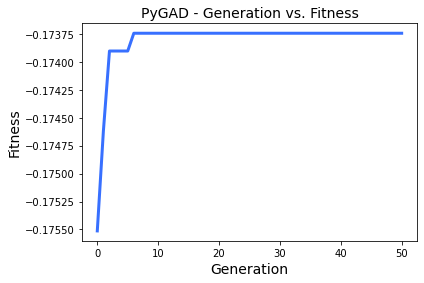

predictions are:  [5.3224    4.054236  3.974891  2.9531488 3.974891  3.922763  4.9578876
 5.485748  4.860857  5.8154283 4.2783647 4.614797  4.494175  5.7036347
 3.8459914 4.7338037 5.0545144 7.4204116 3.974891  4.0815754 8.238783
 3.70996   5.8774886 4.494175  6.1382    3.720564  3.922763  4.054236
 4.186831 ]
Absolute errorrs are:  Row
118    5.677600
79     1.054236
171    1.974891
104    0.046851
134    1.025109
76     2.077237
20     0.042112
165    1.485748
153    1.139143
8      0.815428
6      1.721635
147    0.385203
166    0.505825
179    0.296365
168    3.154009
176    1.266196
40     3.054514
70     0.579588
146    1.974891
130    0.081575
60     1.761217
196    0.709960
144    0.877489
191    5.505825
200    1.861800
160    1.720564
67     0.922763
64     2.054236
169    0.813169
Name: LOS, dtype: float64


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
KNN,1.778736,1.750000,1.495077,1.750000,0.000000,6.333333
Lm1_t-test,1.564003,1.326003,1.137184,1.559046,0.000449,4.557700
Lm2_transformed_t-test,1.523675,1.186618,1.259453,1.372070,0.095539,5.186618
DT_default,2.153935,2.000000,1.789571,1.000000,0.000000,7.000000
RF_default,1.653711,1.019918,1.470319,1.873428,0.088534,5.713431
XGB_default,2.449705,2.560225,1.931901,2.537063,0.004285,7.665752
ANN,1.612490,1.203746,1.198698,1.746894,0.030401,4.714691
XGB_GA,1.537420,1.139143,1.384475,1.264931,0.042112,5.677600


In [151]:
#6-Printing the solotions for xgb
solution_xgb1, solution_fitness_xgb1, solution_idx_xgb1 = ga_instance_xgb1.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution_xgb1))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness_xgb1))

#plot fittness
ga_instance_xgb1.plot_fitness()
# ga_instance.plot_fitness(plot_type="plot")



#7-Predicting model on test data set for xgb
xgb_reg_opt1 = XGBRegressor(n_estimators =  solution_xgb1[0],
                       max_depth =  solution_xgb1[1],               #the maximum depth of each tree
                       learning_rate = solution_xgb1[2],        #learning rate      
                       subsample = solution_xgb1[3],             #the fraction of samples to be used when constructing each tree
                       colsample_bytree = solution_xgb1[4],      #subsample ratio of columns when constructing each tree
                       reg_lambda = solution_xgb1[5],            #L2 (Ridge) regularization term
                       #reg_alpha = solution_xgb1[4],             #L1 (Lasso) regularization term
                       n_jobs = -1,                 #-1 means using all processors.
                       random_state = 0)

xgb_res_opt1 = xgb_reg_opt1.fit(X_train.iloc[:, 1:], logy_train)


#8-XGboost regression model prediction on test data set
pred_xgb_opt1 = xgb_res_opt1.predict(X_test.iloc[:, 1:])
pred_xgb_opt1 = np.exp(pred_xgb_opt1)
print('predictions are: ', pred_xgb_opt1)


#9-Absolute error
abs_err_xgb_opt1 = abs(y_test - pred_xgb_opt1)
print('Absolute errorrs are: ', abs_err_xgb_opt1)




#10-Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_xgb_opt1.mean(),
                                             'Median of AbsErrors' : abs_err_xgb_opt1.median(),
                                             'SD of AbsErrors' :     abs_err_xgb_opt1.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_xgb_opt1),
                                             'Min of AbsErrors':     abs_err_xgb_opt1.min(),
                                             'Max of AbsErrors':     abs_err_xgb_opt1.max()}, index = ['XGB_GA']), 
                               ignore_index = False)

model_comp

### 2-Decision tree(DT) optimization

In [152]:
from sklearn.tree import DecisionTreeRegressor

#### DT-fitness function

In [153]:
#1-defining fitness function for decision tree
#This function must be a maximization function 
#solution = [max_depths, min_samples_leaf, ccp_alpha]
def fitness_func_dt1(solution, solution_idx): #solution: parameters of the dt---soulutoin_idx: the index of parameter
    #relation between fitness and solution
    k = 5
    np.random.seed(0)
    folds = np.random.randint(low = 1, high = k + 1, size = X_train.shape[0])
    cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1))
    for j in range(1, k + 1):
        reg_tree = DecisionTreeRegressor(max_depth = solution[0],
                                     min_samples_leaf = solution[1],
                                     ccp_alpha = solution[2],
                                    random_state = 0)

        tree_res = reg_tree.fit(X_train.iloc[folds != j, 1:], logy_train[folds != j])
        pred = tree_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1,0] = ((logy_train[folds == j] - pred) ** 2).mean()
    
    
    
    fitness = -cv_errors.mean(axis = 0)[0]
    return fitness

#### DT-Initial parameters

In [154]:
#2-defining the  space of DT with the whole range parameters to be used in GA
max_depth_gene_space_dt1 = {'low': 1.0 , 'high': 1000.0 }
min_samples_leaf_dt1 = {'low': 1.0, 'high': 50.0  }
ccp_alpha_dt1 = {'low': 0.0 , 'high': 1  }

#3-defining the  GA parametes and initials fro xgb
fitness_function_dt1 = fitness_func_dt1 

num_generations_dt1 = 50 
num_parents_mating_dt1 = 2 

sol_per_pop_dt1 = 20 #solutiion per population  --- what it should be?
num_genes_dt1 = 3   #=number of parameters

gene_type_dt1 = [int, int, float]
gene_space_dt1 =[max_depth_gene_space_dt1, min_samples_leaf_dt1, ccp_alpha_dt1]

parent_selection_type_dt1  = "sss"  
keep_parents_dt1 = -1                  

crossover_type_dt1 = "uniform" 
crossover_probability_dt1 = 0.6

mutation_type_dt1 = "random"        
mutation_probability_dt1 = 0.01      

#### DT-GA algorithm

In [155]:
#4-building the GA algorithm for dt
#ga_instance_dt1 = pygad.GA(num_generations=num_generations_dt1,
#                       num_parents_mating=num_parents_mating_dt1,
#                       fitness_func=fitness_function_dt1,
#                       sol_per_pop=sol_per_pop_dt1,
#                       num_genes=num_genes_dt1,
#                       gene_type=gene_type_dt1,
#                       gene_space=gene_space_dt1,
#                       parent_selection_type=parent_selection_type_dt1,         
#                       keep_parents=keep_parents_dt1,
#                       crossover_type=crossover_type_dt1,
#                       crossover_probability=crossover_probability_dt1,
#                       mutation_type=mutation_type_dt1,
#                       mutation_probability=mutation_probability_dt1)
#                       #stop_criteria=[ "saturate_20"]) #stop criteria
        
        
        
#5-runing the GA for dt
#import time #to measure the processing time
#start_time = time.time()
#np.random.seed(0)
#ga_instance_dt1.run()
#end_time = time.time()
#print('The Processing time is: ', (end_time - start_time)/60, 'minuts') 

In [156]:
#saving and loading the results
#The Processing time is:  0.1026909589767456 minuts
filename = 'genetic_DT3'
#ga_instance_dt1.save(filename=filename)
ga_instance_dt1 = pygad.load('F:\\Atefe\\Arshad\\98-sanaye\\0-payan name- edari\\payanname\\paper\\English paper-journal of healthcare engineering\\files\\code files\\genetic_DT3')

#### DT-GA Results

Parameters of the best solution : [224 17 0.9280812934655909]
Fitness value of the best solution = -0.19774420483297167


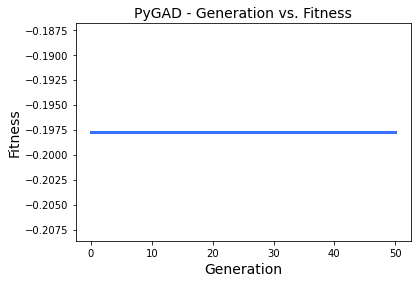

predictions are:  [4.65018354 4.65018354 4.65018354 4.65018354 4.65018354 4.65018354
 4.65018354 4.65018354 4.65018354 4.65018354 4.65018354 4.65018354
 4.65018354 4.65018354 4.65018354 4.65018354 4.65018354 4.65018354
 4.65018354 4.65018354 4.65018354 4.65018354 4.65018354 4.65018354
 4.65018354 4.65018354 4.65018354 4.65018354 4.65018354]
Absolute errors are:  Row
118    6.349816
79     1.650184
171    2.650184
104    1.650184
134    0.349816
76     1.349816
20     0.349816
165    0.650184
153    1.349816
8      0.349816
6      1.349816
147    0.349816
166    0.349816
179    1.349816
168    2.349816
176    1.349816
40     2.650184
70     3.349816
146    2.650184
130    0.650184
60     5.349816
196    1.650184
144    0.349816
191    5.349816
200    3.349816
160    2.650184
67     1.650184
64     2.650184
169    0.349816
Name: LOS, dtype: float64


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
KNN,1.778736,1.750000,1.495077,1.750000,0.000000,6.333333
Lm1_t-test,1.564003,1.326003,1.137184,1.559046,0.000449,4.557700
Lm2_transformed_t-test,1.523675,1.186618,1.259453,1.372070,0.095539,5.186618
DT_default,2.153935,2.000000,1.789571,1.000000,0.000000,7.000000
RF_default,1.653711,1.019918,1.470319,1.873428,0.088534,5.713431
XGB_default,2.449705,2.560225,1.931901,2.537063,0.004285,7.665752
ANN,1.612490,1.203746,1.198698,1.746894,0.030401,4.714691
XGB_GA,1.537420,1.139143,1.384475,1.264931,0.042112,5.677600
DT_GA,1.946507,1.650184,1.608787,2.000000,0.349816,6.349816


In [157]:
#6-Printing the solotions for dt
solution_dt1, solution_fitness_dt1, solution_idx_dt1 = ga_instance_dt1.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution_dt1))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness_dt1))


#plot fittness
ga_instance_dt1.plot_fitness()
# ga_instance.plot_fitness(plot_type="plot")


#7-Predicting model on test data set for dt
dt_reg_opt1 = DecisionTreeRegressor(max_depth = solution_dt1[0],
                                     min_samples_leaf = solution_dt1[1],
                                     ccp_alpha = solution_dt1[2], 
                                   random_state = 0)

dt_res_opt1 = dt_reg_opt1.fit(X_train.iloc[:, 1:], logy_train)


#8-dt regression model prediction on test data set
pred_dt_opt1 = dt_res_opt1.predict(X_test.iloc[:, 1:])
pred_dt_opt1  = np.exp(pred_dt_opt1 )
print('predictions are: ',pred_dt_opt1 )

#9-Absolute error
abs_err_dt_opt1 = abs(y_test - pred_dt_opt1)
print('Absolute errors are: ',abs_err_dt_opt1)




#10-Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_dt_opt1.mean(),
                                             'Median of AbsErrors' : abs_err_dt_opt1.median(),
                                             'SD of AbsErrors' :     abs_err_dt_opt1.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_dt_opt1),
                                             'Min of AbsErrors':     abs_err_dt_opt1.min(),
                                             'Max of AbsErrors':     abs_err_dt_opt1.max()}, index = ['DT_GA']), 
                               ignore_index = False)

model_comp

### Randomforest(RF) optimization

#### RF-fitness function

In [158]:
#1-defining fitness function for RF
#This function must be a maximization function 
#solution = [ max_features, n_estimators, max_depth, min_samples_leaf, max_samples]
def fitness_func_rf1(solution, solution_idx): #solution: parameters of the rf----soulutoin_idx: the index of parameter
    #relation between fitness and solution
    k = 5
    np.random.seed(0)
    folds = np.random.randint(low = 1, high = k + 1, size = X_train.shape[0])
    cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1))
    for j in range(1, k + 1):
        rf_reg = RandomForestRegressor(max_features = solution[0],
                                   n_estimators = solution[1],
                                   max_depth = solution[2],
                                   min_samples_leaf = solution[3],
                                   max_samples = solution[4],
                                   random_state = 0)
        rf_res = rf_reg.fit(X_train.iloc[folds != j, 1:], logy_train[folds != j])
        pred = rf_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1, 0] = ((logy_train[folds == j] - pred) ** 2).mean()
        
    fitness = -cv_errors.mean(axis = 0)[0] 
    return fitness

#### RF- Initial parameters

In [159]:
#2-defining the  space of rf with the whole range parameters to be used in GA
max_features_rf1 = {'low':1, 'high':X_train.shape[1]-1, 'step':1}
n_estimators_rf1 = {'low':10.0,'high':1000.0}
max_depth_rf1 = {'low':1.0, 'high':50.0}
min_samples_leaf_rf1 = {'low':1.0,'high':50.0}
max_samples_rf1 = {'low':0.1,'high':1.0}

#3-defining the  GA parametes and initials fro bagging
fitness_function_rf1 = fitness_func_rf1 

num_generations_rf1 = 50 
num_parents_mating_rf1 = 2 

sol_per_pop_rf1 = 20 #solutiion per population 
num_genes_rf1 = 5   #=number of parameters

gene_type_rf1 = [int,int, int, int, float]
gene_space_rf1 =[max_features_rf1, n_estimators_rf1, max_depth_rf1, min_samples_leaf_rf1, max_samples_rf1]

parent_selection_type_rf1  = "sss"  
#K_tournament6=5
keep_parents_rf1 = -1                   

crossover_type_rf1 = "uniform" 
crossover_probability_rf1 = 0.6

mutation_type_rf1 = "random"        
mutation_probability_rf1 = 0.01

#### RF-GA optimization

In [160]:
#4-building the GA algorithm for bagging

#ga_instance_rf1 = pygad.GA(num_generations=num_generations_rf1,
#                       num_parents_mating=num_parents_mating_rf1,
#                       fitness_func=fitness_function_rf1,
#                       sol_per_pop=sol_per_pop_rf1,
#                       num_genes=num_genes_rf1,
#                       gene_type=gene_type_rf1,
#                       gene_space=gene_space_rf1,
#                       parent_selection_type=parent_selection_type_rf1,  
#                       keep_parents=keep_parents_rf1,
#                       crossover_type=crossover_type_rf1,
#                       crossover_probability=crossover_probability_rf1,
#                       mutation_type=mutation_type_rf1,
#                       mutation_probability=mutation_probability_rf1)
#                       #stop_criteria=[ "saturate_15"]) #stop criteria
        
              
#5-runing the GA for xgb
#import time #to measure the processing time
#start_time = time.time()
#np.random.seed(0)
#ga_instance_rf1.run()
#end_time = time.time()
#print('The Processing time is: ', (end_time - start_time)/60, 'minuts')   

In [161]:
#Saving and loading the perevious results
#The Processing time is:  3.0476489861806235 minuts 
filename = 'genetic_rf3'
#ga_instance_rf1.save(filename=filename)
ga_instance_rf1 = pygad.load('F:\\Atefe\\Arshad\\98-sanaye\\0-payan name- edari\\payanname\\paper\\English paper-journal of healthcare engineering\\files\\code files\\genetic_rf3')

#### RF-GA results

Parameters of the best solution : [6 883 43 8 0.6540036078554597]
Fitness value of the best solution = -0.18078759471723357


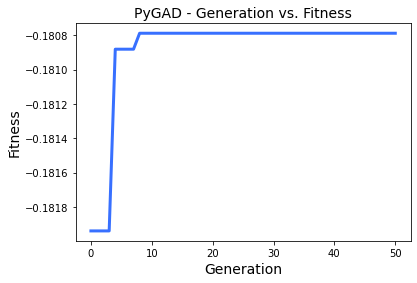

predictions are:  [5.4275033  4.33956355 4.26252619 3.81502728 4.15713082 4.21992919
 4.95912435 5.2405212  4.85995408 5.46981543 4.37204893 4.53198744
 4.90806651 4.56921863 4.17114781 5.04261525 5.05424317 5.68398963
 4.15713082 4.13699295 6.30530495 3.92693927 5.7153349  4.83880265
 4.26352124 4.13169967 4.24086304 4.33848837 4.40343259]
Absolute errors are:  Row
118    5.572497
79     1.339564
171    2.262526
104    0.815027
134    0.842869
76     1.780071
20     0.040876
165    1.240521
153    1.140046
8      0.469815
6      1.627951
147    0.468013
166    0.091933
179    1.430781
168    2.828852
176    0.957385
40     3.054243
70     2.316010
146    2.157131
130    0.136993
60     3.694695
196    0.926939
144    0.715335
191    5.161197
200    3.736479
160    2.131700
67     1.240863
64     2.338488
169    0.596567
Name: LOS, dtype: float64


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
KNN,1.778736,1.750000,1.495077,1.750000,0.000000,6.333333
Lm1_t-test,1.564003,1.326003,1.137184,1.559046,0.000449,4.557700
Lm2_transformed_t-test,1.523675,1.186618,1.259453,1.372070,0.095539,5.186618
DT_default,2.153935,2.000000,1.789571,1.000000,0.000000,7.000000
RF_default,1.653711,1.019918,1.470319,1.873428,0.088534,5.713431
XGB_default,2.449705,2.560225,1.931901,2.537063,0.004285,7.665752
ANN,1.612490,1.203746,1.198698,1.746894,0.030401,4.714691
XGB_GA,1.537420,1.139143,1.384475,1.264931,0.042112,5.677600
DT_GA,1.946507,1.650184,1.608787,2.000000,0.349816,6.349816
RF_GA,1.762599,1.339564,1.416888,1.500983,0.040876,5.572497


In [162]:
#6-Printing the solotions for RF
solution_rf1, solution_fitness_rf1, solution_idx_rf1 = ga_instance_rf1.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution_rf1))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness_rf1))


#plot fittness
ga_instance_rf1.plot_fitness()
# ga_instance.plot_fitness(plot_type="plot")


#7-Predicting model on test data set for xgb
rf_reg_opt1 = RandomForestRegressor(max_features = solution_rf1[0],
                                   n_estimators = solution_rf1[1],
                                   max_depth = solution_rf1[2],
                                   min_samples_leaf = solution_rf1[3],
                                   max_samples = solution_rf1[4],
                                   random_state = 0)

rf_res_opt1 = rf_reg_opt1.fit(X_train.iloc[:, 1:], logy_train)


#8-XGboost regression model prediction on test data set
pred_rf_opt1 = rf_res_opt1.predict(X_test.iloc[:, 1:])
pred_rf_opt1  = np.exp(pred_rf_opt1 )
print('predictions are: ',pred_rf_opt1 )

#9-Absolute error
abs_err_rf_opt1 = abs(y_test - pred_rf_opt1)
print('Absolute errors are: ',abs_err_rf_opt1)




#10-Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_rf_opt1.mean(),
                                             'Median of AbsErrors' : abs_err_rf_opt1.median(),
                                             'SD of AbsErrors' :     abs_err_rf_opt1.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_rf_opt1),
                                             'Min of AbsErrors':     abs_err_rf_opt1.min(),
                                             'Max of AbsErrors':     abs_err_rf_opt1.max()}, index = ['RF_GA']), 
                               ignore_index = False)

model_comp

In [163]:
model_comp.to_csv('F:\\Atefe\\Arshad\\98-sanaye\\0-payan name- edari\\payanname\\paper\\English paper-journal of healthcare engineering\\files\\code files\\model comp_6thrun.csv')

In [164]:
model_comp.to_excel('F:\\Atefe\\Arshad\\98-sanaye\\0-payan name- edari\\payanname\\paper\\English paper-journal of healthcare engineering\\files\\code files\\model comp_6thrun.xlsx')

## Plots and model comparison

### Error box plots

In [165]:
#abs_err and Prediction data
abs_err_name = ['(a) KNN','(b) Lm', '(c) Lm_transformed', '(d) DT_default', '(e) DT_GA', 
                '(f) ANN','(g) XGB_default', '(h) XGB_GA','(i) RF_default','(j) RF_GA']
abs_err = [abs_err_knn, abs_err_lm1_ttets, abs_err_lm2, abs_err_tree_default, abs_err_dt_opt1,
           abs_err_ann, abs_err_xgb, abs_err_xgb_opt1, abs_err_rf, abs_err_rf_opt1  ]
Preds = [pred_knn, pred_lm1_ttest, pred_lm2_ttest, pred_tree_default, pred_dt_opt1,
         pred_ann, pred_xgb, pred_xgb_opt1, pred_rf, pred_rf_opt1   ]

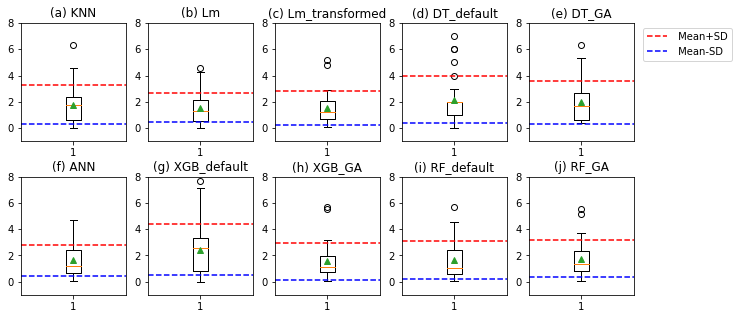

In [166]:
#All box plots together
import seaborn as sns  #for plots
import matplotlib.pyplot as plt # for plots


plot = plt.figure(figsize = (11, 5)) 
plot.subplots_adjust(hspace = 0.3, wspace = 0.2)
for i in range(1, 11):
    plt = plot.add_subplot(2, 5, i)
    plt.boxplot(abs_err[i-1], showmeans = True)
    plt.title.set_text( abs_err_name[i-1])
    plt.axhline(y = abs_err[i-1].mean() + abs_err[i-1].std(), color = 'r', linestyle = '--', label = " Mean+SD")
    plt.axhline(y = abs_err[i-1].mean() - abs_err[i-1].std(), color = 'b', linestyle = '--', label = " Mean-SD")
    plt.set(ylim=(-1, 8))
plt.legend(bbox_to_anchor = (1.5, 2.3), loc = 'upper center')

    #plt.ylabel('Absolute Error(day)')
  
    

No handles with labels found to put in legend.


Text(0.5, 0, 'Prediction Models')

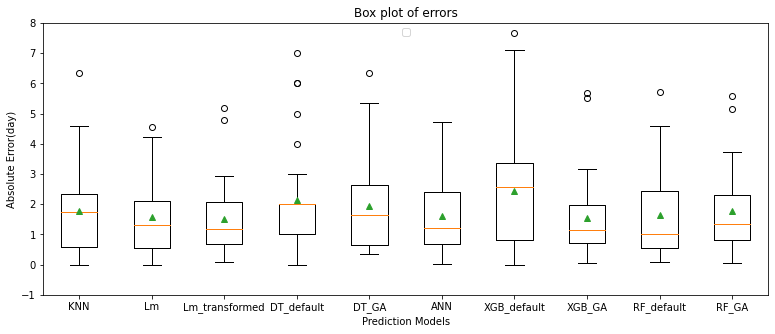

In [167]:
#All box plots together
import seaborn as sns  #for plots
import matplotlib.pyplot as plt # for plots

abs_err_name = ['KNN','Lm', 'Lm_transformed', 'DT_default', 'DT_GA', 
                'ANN','XGB_default', 'XGB_GA','RF_default','RF_GA']
abs_err = [abs_err_knn, abs_err_lm1_ttets, abs_err_lm2, abs_err_tree_default, abs_err_dt_opt1,
           abs_err_ann, abs_err_xgb, abs_err_xgb_opt1, abs_err_rf, abs_err_rf_opt1  ]

plot = plt.figure(figsize = (13, 5)) 
plot.subplots_adjust(hspace = 0.2, wspace = 0.2)
#for i in range(1, 11):
plt = plot.add_subplot()
plt.boxplot(abs_err, showmeans = True, labels = abs_err_name)
plt.title.set_text( 'Box plot of errors')
#plt.axhline(y = abs_err.mean() + abs_err.std(), color = 'r', linestyle = '--', label = " Mean+SD")
#plt.axhline(y = abs_err.mean() - abs_err.std(), color = 'b', linestyle = '--', label = " Mean-SD")
plt.set(ylim=(-1, 8))
#plt.legend(bbox_to_anchor = (1.5, 2.3), loc = 'upper center')
plt.legend( loc = 'upper center')
plt.set_ylabel('Absolute Error(day)')
plt.set_xlabel('Prediction Models')
  
    

### Predicted vs. Actual plots

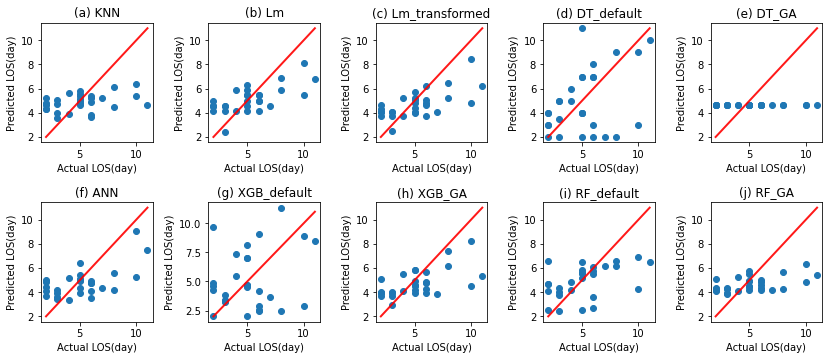

In [168]:
#All actual vs. Prediction plots together
import seaborn as sns  #for plots
import matplotlib.pyplot as plt # for plots

#abs_err and Prediction data
abs_err_name = ['(a) KNN','(b) Lm', '(c) Lm_transformed', '(d) DT_default', '(e) DT_GA', 
                '(f) ANN','(g) XGB_default', '(h) XGB_GA','(i) RF_default','(j) RF_GA']
abs_err = [abs_err_knn, abs_err_lm1_ttets, abs_err_lm2, abs_err_tree_default, abs_err_dt_opt1,
           abs_err_ann, abs_err_xgb, abs_err_xgb_opt1, abs_err_rf, abs_err_rf_opt1  ]
Preds = [pred_knn, pred_lm1_ttest, pred_lm2_ttest, pred_tree_default, pred_dt_opt1,
         pred_ann, pred_xgb, pred_xgb_opt1, pred_rf, pred_rf_opt1   ]

plot = plt.figure(figsize = (14, 5.5)) 
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 11):
    plt = plot.add_subplot(2, 5, i)
    plt.scatter(x = y_test, y = Preds[i-1])
    plt.set_xlabel('Actual LOS(day)')
    plt.set_ylabel('Predicted LOS(day)')
    plt.title.set_text( abs_err_name[i-1])
    xp = np.linspace(y_test.min(), y_test.max(), 100)
    plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')


### Histogram of errors

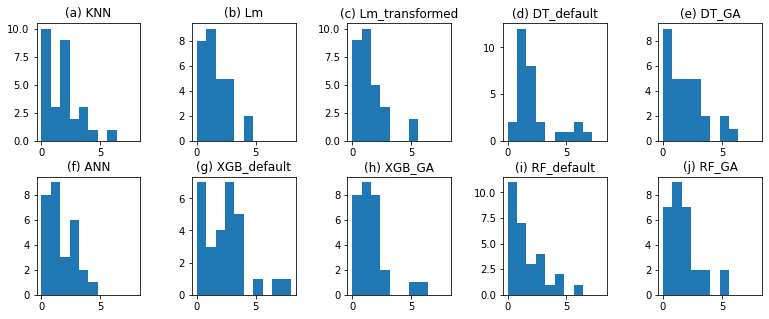

In [169]:
#All actual vs. Prediction plots together
import seaborn as sns  #for plots
import matplotlib.pyplot as plt # for plots

plot = plt.figure(figsize = (13, 5)) 
plot.subplots_adjust(hspace = 0.3, wspace = 0.5)
for i in range(1, 11):
    plt = plot.add_subplot(2, 5, i)
    plt.hist(x = abs_err[i-1], range = (0, 8))
    plt.title.set_text( abs_err_name[i-1])
    #xp = np.linspace(y_test.min(), y_test.max(), 100)
    #plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')